# Introduction

Ecommerce companies customer segmentation provides insights on customers behaviors. It leverages acquired customer data like the one we have, transactions data in order to divide customers into groups.

Our goal is to generate clusters for our customers to get insights in:

- Increasing Revenue (Knowing customers who present most of our revenue)
- Increasing Customer Retention
- Discovering Trends and Patterns
- Defining Customers at Risk

RFM Analysis answers these questions:

- Who are our Best Customers?
- Who has the potential to be converted into more Profitable Customers?
- Which customers must we retain?
- Which group of customers is most likely to respond to our current campaign?


**Load the required libraries and read data from Online retail excel file**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
Retail = pd.read_excel("Online Retail.xlsx")
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


This dataframe contains 8 variables that correspond to:

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal, the name of the country where each customer resides.

In [3]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
Retail.sample(9)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
510816,579470,23313,VINTAGE CHRISTMAS BUNTING,2,2011-11-29 15:06:00,4.95,16549.0,United Kingdom
455407,575615,82582,??,-130,2011-11-10 12:51:00,0.00,NaN,United Kingdom
212013,555405,23233,WRAP POPPIES DESIGN,25,2011-06-02 19:17:00,0.42,17531.0,United Kingdom
252292,559107,35961,FOLKART ZINC HEART CHRISTMAS DEC,5,2011-07-06 11:22:00,0.85,15334.0,United Kingdom
326839,565596,21914,BLUE HARMONICA IN BOX,5,2011-09-05 14:27:00,1.25,16444.0,United Kingdom
363041,568531,21670,BLUE SPOT CERAMIC DRAWER KNOB,6,2011-09-27 13:49:00,1.45,16713.0,United Kingdom
410631,572121,21790,VINTAGE SNAP CARDS,12,2011-10-20 19:51:00,0.85,17092.0,United Kingdom
243280,558441,21136,PAINTED METAL PEARS ASSORTED,8,2011-06-29 12:59:00,1.69,14606.0,United Kingdom
463645,576069,22266,EASTER DECORATION HANGING BUNNY,13,2011-11-13 15:57:00,0.19,13603.0,United Kingdom


In [5]:
Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
Retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
#Unique values of each Attribute
print("Number of Transactions: ", Retail['InvoiceNo'].nunique())
print("Number of Products bought: ",Retail['StockCode'].nunique())
print("Number of Customers:", Retail['CustomerID'].nunique() )
print("Percentage of Null Customers: ", round(Retail['CustomerID'].isnull().sum() * 100 / len(Retail),2),"%" )
print('Number of Countries: ',Retail['Country'].nunique())

Number of Transactions:  25900
Number of Products bought:  4070
Number of Customers: 4372
Percentage of Null Customers:  24.93 %
Number of Countries:  38


In [8]:
Retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Cancelled Orders

In [9]:
#We can see that the minimum qualtity falls below 0 i.e. there are cancelled or returned items
#Making a dataset which only contains cancelled orders
cancelled_orders = Retail[Retail['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [10]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [11]:
#With the above code we are reassured that Invoiceno's which have 'c' in them are cancelled/returned
#Let's see how what percentage of cancelled orders we have
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = Retail['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print(f'Percentage of orders canceled: {cancelled_number}/{total_orders} = ({cancelled_number/total_orders*100:.2f}%)')

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 = (35.86%)


We can see that signicant amount of our orders have been cancelled/returned. It would be nice to know the
reason behind these cancellations/returns which will help us lower our cancellation rates.

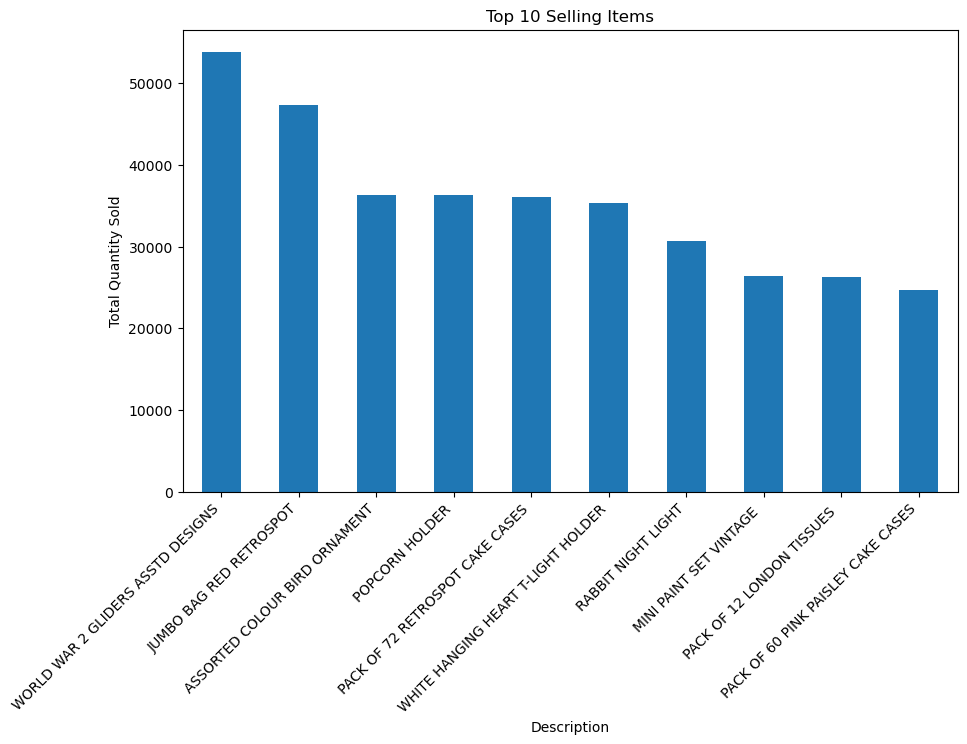

In [12]:
#Visualizing the top selling items
top_selling_items = Retail.groupby('Description')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_selling_items.plot(kind='bar')
plt.title('Top 10 Selling Items')
plt.xlabel('Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

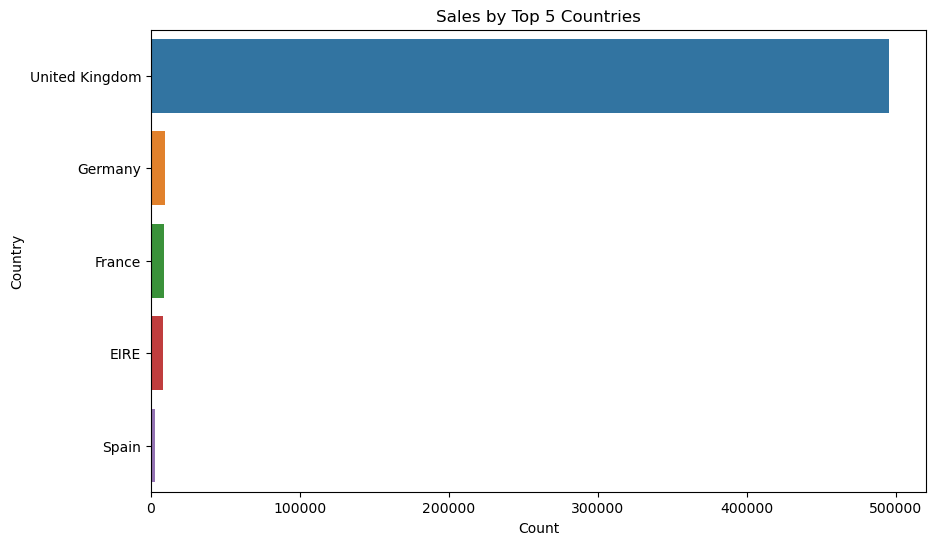

In [13]:
#Visualizing Sales by Top 5 Countries
top_countries = Retail['Country'].value_counts().nlargest(5).index
Retail_top_countries = Retail[Retail['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=Retail_top_countries, order=top_countries)
plt.title('Sales by Top 5 Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

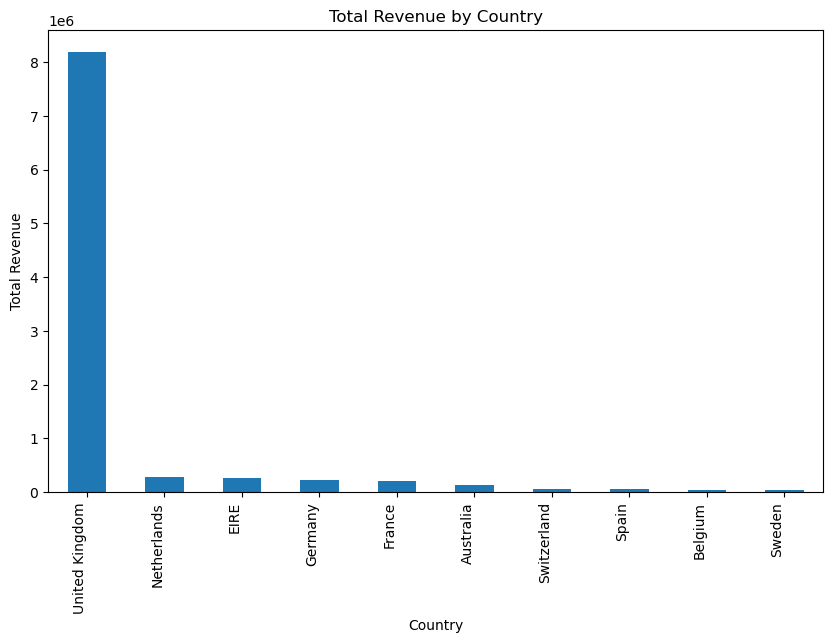

In [14]:
#Total Revenue by Country
Retail['TotalRevenue'] = Retail['Quantity'] * Retail['UnitPrice']
total_revenue_by_country = Retail.groupby('Country')['TotalRevenue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
total_revenue_by_country.plot(kind='bar')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90, ha='right')
plt.show()

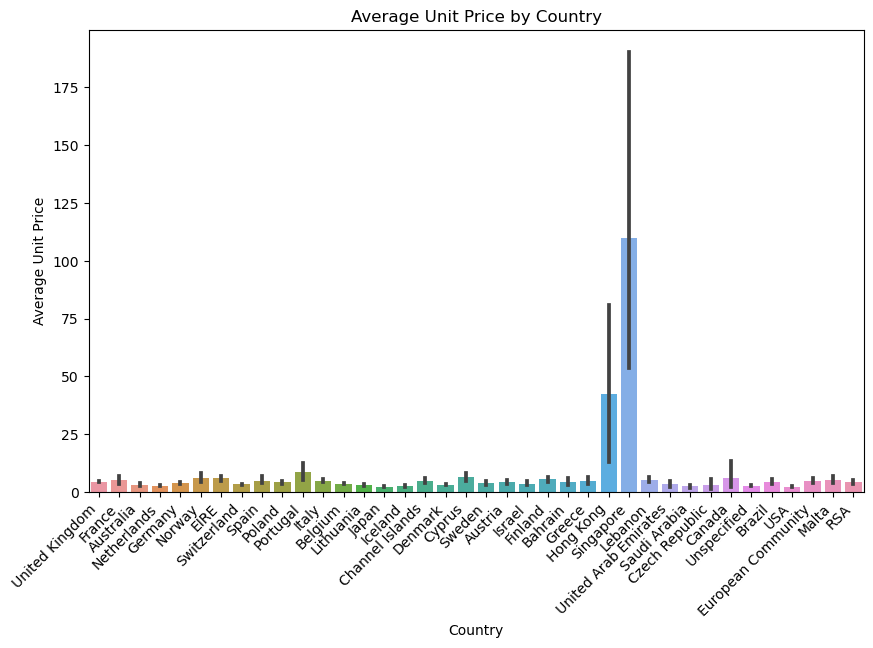

In [15]:
#Average Unit Price by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='UnitPrice', data=Retail)
plt.title('Average Unit Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45, ha='right')
plt.show()

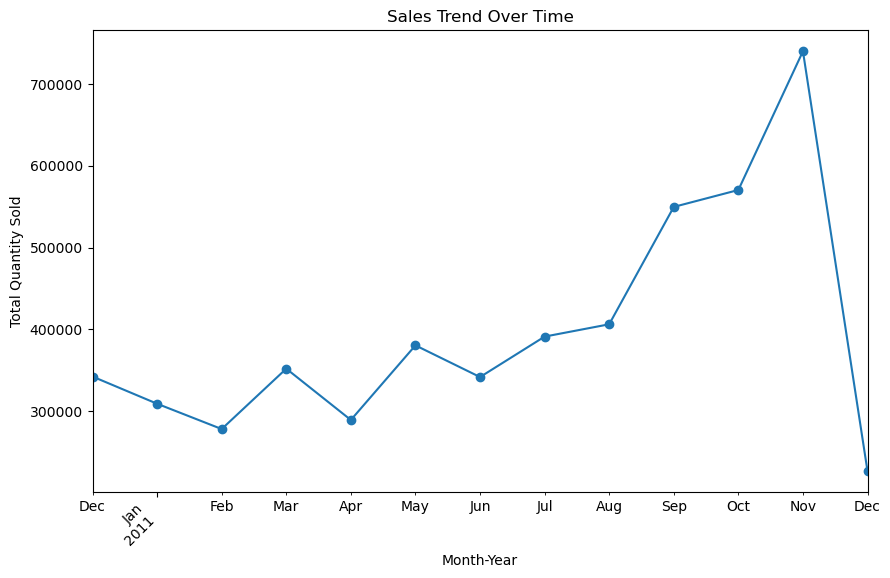

In [16]:
#Visualize Sales Trend Over Time
Retail['InvoiceMonthYear'] = Retail['InvoiceDate'].dt.to_period('M')
sales_trend = Retail.groupby('InvoiceMonthYear')['Quantity'].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(marker = 'o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

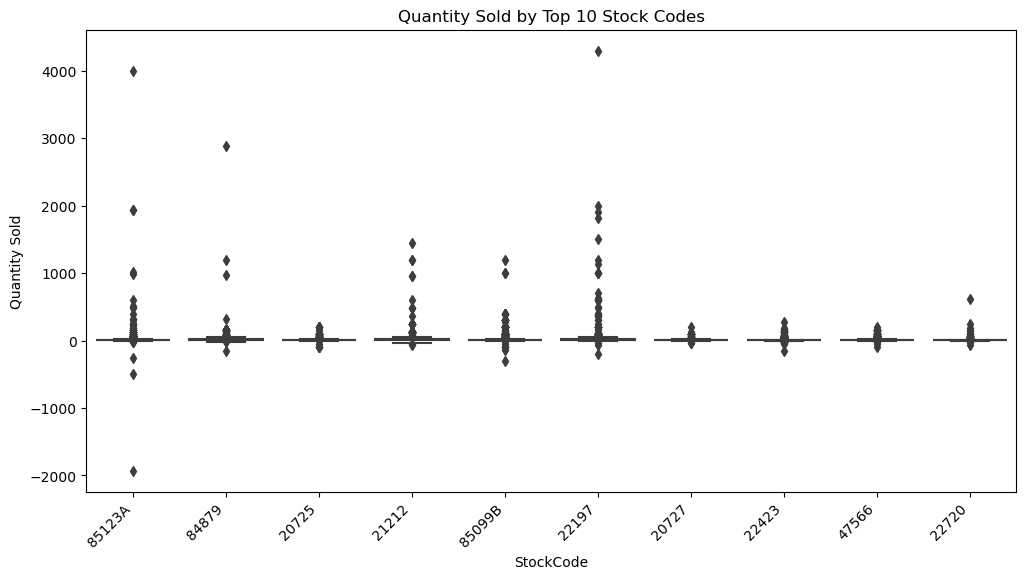

In [17]:
#Quantity Sold by StockCode
plt.figure(figsize=(12, 6))
top_stock_codes = Retail['StockCode'].value_counts().nlargest(10).index
Retail_top_stock_codes = Retail[Retail['StockCode'].isin(top_stock_codes)]
sns.boxplot(x='StockCode', y='Quantity', data=Retail_top_stock_codes)
plt.title('Quantity Sold by Top 10 Stock Codes')
plt.xlabel('StockCode')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
#Creating a new column to store Total Revenue
Retail['TotalRevenue']=Retail['Quantity']*Retail['UnitPrice']
Retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,InvoiceMonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12


In [19]:
#Creating a Function to count the unique number of Attributes for each column
def c_unique(df):
    unique_counts = {}
    for column in df.columns:
        unique_counts[column] = df[column].nunique()
    for column, count in unique_counts.items():
        print(f"{column} : {count}")

c_unique(Retail)

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38
TotalRevenue : 6204
InvoiceMonthYear : 13


In [20]:
#Making sure we are only working with entries where CustomerID is not NaN
RDF = Retail[np.isfinite(Retail['CustomerID'])]

In [21]:
#Counting the Unique number of Attributes for each column for the new dataframe
c_unique(RDF)

InvoiceNo : 22190
StockCode : 3684
Description : 3896
Quantity : 436
InvoiceDate : 20460
UnitPrice : 620
CustomerID : 4372
Country : 37
TotalRevenue : 4041
InvoiceMonthYear : 13


In [22]:
RDF.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
TotalRevenue        0
InvoiceMonthYear    0
dtype: int64

In [23]:
#For the sake of calculating recency and frequency we will drop the rows with 
#negative values of Quantity and store the data in final_df
FRDF = RDF[RDF['Quantity'] > 0]

In [24]:
FRDF.shape

(397924, 10)

In [25]:
c_unique(FRDF)

InvoiceNo : 18536
StockCode : 3665
Description : 3877
Quantity : 302
InvoiceDate : 17286
UnitPrice : 441
CustomerID : 4339
Country : 37
TotalRevenue : 2940
InvoiceMonthYear : 13


In [26]:
FRDF['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [27]:
FRDF['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [28]:
#To Calculate Recency and Frequency we will include all the inputs by 
#taking "NOW" date as higher than the max date in the data set
import datetime as dt
NOW = dt.datetime(2011,12,10)

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to react to promotions and future Personalization Services.

- **Recency (R)**: Days since last Purchase
- **Frequency (F)**: Total number of Purchases
- **Monetary Value (M)**: Total money this Customer spent.

We will create those 3 Customer attributes for each Customer.

In [29]:
#Creating a new DataFrame by computing and inserting RFM metrics.
RFM = FRDF.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'TotalRevenue': lambda x: x.sum()})
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency',
                       'TotalRevenue': 'MonetaryValue'}, inplace=True)

In [30]:
RFM.shape

(4339, 3)

In [31]:
RFM.head(4)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55


In [32]:
RFM.sort_values(['Frequency', 'MonetaryValue'], ascending=[False, False], inplace=True)

In [33]:
#Top 10 Customers
RFM.head(10)

,Recency,Frequency,MonetaryValue
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65
15311.0,0,2379,60767.90
14646.0,1,2080,280206.02
13089.0,2,1818,58825.83
13263.0,1,1677,7454.07


# Applying RFM Score Formula

The simplest way to create Customer Segments from the RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency, and Monetary. Four is the best/highest value and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.


In [34]:
quar = RFM.quantile(q=[0.25,0.5,0.75])
quar

,Recency,Frequency,MonetaryValue
0.25,17.0,17.0,307.245
0.50,50.0,41.0,674.450
0.75,141.5,100.0,1661.640


In [35]:
quar.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'MonetaryValue': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.64}}

Creation of RFM Segmentation Table:
We will create two Segmentation Classes because
high recency is bad and high frequency and monetary value is good.

In [36]:
#Variables x = value, p = recency, monetary_value, frequency, d = quartiles dict
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Variables x = value, p = recency, monetary_value, frequency, d = quartiles dict
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [37]:
#Creating a RFM Segmentation Table
seg = RFM
seg['R_Quartile'] = seg['Recency'].apply(RScore, args=('Recency',quar))
seg['F_Quartile'] = seg['Frequency'].apply(FMScore, args=('Frequency',quar))
seg['M_Quartile'] = seg['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quar))

In [38]:
seg.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
17841.0,1,7847,40991.57,4,4,4
14911.0,1,5677,143825.06,4,4,4
14096.0,4,5111,65164.79,4,4,4
12748.0,0,4596,33719.73,4,4,4
14606.0,1,2700,12156.65,4,4,4


Now that we have the score of each customer, we can represent our customer segmentation.
First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [39]:
seg['RFMScore'] = seg.R_Quartile.map(str) \
                            + seg.F_Quartile.map(str) \
                            + seg.M_Quartile.map(str)
seg.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
17841.0,1,7847,40991.57,4,4,4,444
14911.0,1,5677,143825.06,4,4,4,444
14096.0,4,5111,65164.79,4,4,4,444
12748.0,0,4596,33719.73,4,4,4,444
14606.0,1,2700,12156.65,4,4,4,444


In [40]:
seg[seg['RFMScore'] == '444'].sort_values('MonetaryValue', ascending = False).head(10)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
14646.0,1,2080,280206.02,4,4,4,444
18102.0,0,431,259657.30,4,4,4,444
17450.0,8,337,194550.79,4,4,4,444
14911.0,1,5677,143825.06,4,4,4,444
14156.0,9,1400,117379.63,4,4,4,444
17511.0,2,963,91062.38,4,4,4,444
16684.0,4,277,66653.56,4,4,4,444
14096.0,4,5111,65164.79,4,4,4,444
13694.0,3,568,65039.62,4,4,4,444


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

In [41]:
print("Best Customers: ", len(seg[seg['RFMScore'] == '444']))
print('Loyal Customers: ', len(seg[seg['F_Quartile'] == 4]))
print("Big Spenders: ", len(seg[seg['M_Quartile'] == 4]))
print('Almost Lost: ', len(seg[seg['RFMScore'] == '244']))
print('Lost Customers: ', len(seg[seg['RFMScore'] == '144']))
print('One Time or Unsatisfied Customers: ', len(seg[seg['RFMScore'] == '111']))

Best Customers:  440
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  103
Lost Customers:  21
One Time or Unsatisfied Customers:  384


## Customer Segmentation Based on Behavioral Analysis

By analyzing customer behavior, we have categorized them into six distinct groups: Best Customers, Loyal Customers, Big Spenders, Almost Lost, Lost Customers, and One-Time or Unsatisfied Customers. Each group requires specific marketing strategies to enhance engagement and optimize spending.

### Best Customers
- **Count**: 440
- **Characteristics**: These are the top-performing customers in terms of engagement and spending. They consistently make high-value purchases and are highly loyal.
- **Strategies**:
  - **Exclusive Rewards**: Offer exclusive rewards such as special discounts, VIP events, and early access to new products.
  - **Personalized Offers**: Provide personalized offers and recommendations based on their purchase history.
  - **Referral Incentives**: Encourage them to refer friends by offering substantial rewards for successful referrals.

### Loyal Customers
- **Count**: 1080
- **Characteristics**: These customers frequently shop and show high loyalty but may not have the highest spending levels.
- **Strategies**:
  - **Loyalty Programs**: Strengthen loyalty programs with tiered rewards that increase benefits based on spending levels.
  - **Consistent Engagement**: Maintain regular communication through newsletters, personalized emails, and exclusive content.
  - **Special Promotions**: Offer special promotions and discounts to encourage more frequent purchases.

### Big Spenders
- **Count**: 1085
- **Characteristics**: These customers make high-value purchases but may not shop as frequently as loyal customers.
- **Strategies**:
  - **Premium Services**: Provide premium services such as personal shopping assistance, free delivery, and exclusive events.
  - **Targeted Campaigns**: Run targeted marketing campaigns that highlight high-end products and exclusive offers.
  - **Retention Focus**: Implement strategies to increase their shopping frequency, such as tailored promotions or bundling offers.

### Almost Lost
- **Count**: 103
- **Characteristics**: These customers have shown signs of disengagement and may be close to churning.
- **Strategies**:
  - **Reactivation Campaigns**: Launch reactivation campaigns with personalized messages and special incentives to re-engage them.
  - **Feedback Requests**: Request feedback to understand their reasons for disengagement and address any issues.
  - **Time-Limited Offers**: Offer time-limited discounts or promotions to encourage immediate action.

### Lost Customers
- **Count**: 21
- **Characteristics**: These customers have not made any purchases for a significant period and are considered inactive.
- **Strategies**:
  - **Win-Back Campaigns**: Implement win-back campaigns with compelling offers to regain their interest.
  - **Surveys and Feedback**: Conduct surveys to understand why they stopped shopping and address any identified concerns.
  - **Personalized Outreach**: Use personalized outreach to show them they are missed and valued, possibly through direct calls or personalized emails.

### One-Time or Unsatisfied Customers
- **Count**: 384
- **Characteristics**: These customers made only one purchase or expressed dissatisfaction with their experience.
- **Strategies**:
  - **Improvement Initiatives**: Address potential pain points by improving product quality and customer service.
  - **Follow-Up Offers**: Send follow-up offers or discounts to encourage a second purchase and turn them into repeat customers.
  - **Customer Support**: Enhance customer support to resolve any issues they might have faced and ensure a better experience in future interactions.

## Conclusion

Segmenting customers into Best Customers, Loyal Customers, Big Spenders, Almost Lost, Lost Customers, and One-Time or Unsatisfied Customers allows for highly targeted marketing strategies that address the unique behaviors and needs of each group. This tailored approach can significantly improve customer engagement, retention, and overall spending.

To further optimize these strategies, continuous monitoring and analysis of customer behavior are crucial. By understanding the nuances of each segment and adapting strategies accordingly, businesses can ensure they are meeting customer needs effectively and maximizing their lifetime value.


### Applying K-means clustering on RFM variables Preprocess Data

In [42]:
RFM.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
17841.0,1,7847,40991.57,4,4,4,444
14911.0,1,5677,143825.06,4,4,4,444
14096.0,4,5111,65164.79,4,4,4,444
12748.0,0,4596,33719.73,4,4,4,444
14606.0,1,2700,12156.65,4,4,4,444


In [43]:
RFM = RFM.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
RFM.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65


In [44]:
RFM.corr()

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206085,-0.122190
Frequency,-0.206085,1.000000,0.422289
MonetaryValue,-0.122190,0.422289,1.000000


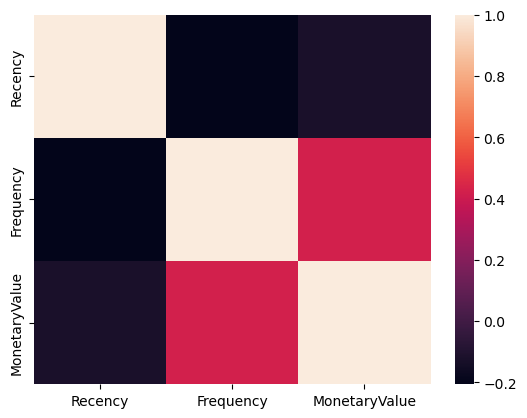

In [45]:
sns.heatmap(RFM.corr())
plt.show()

We see a negative correlation between Recency and Monetary.
The correlation between Monetary and Frequency is positive but still not strong.

Visualize feature distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the three features present in the RFM data.

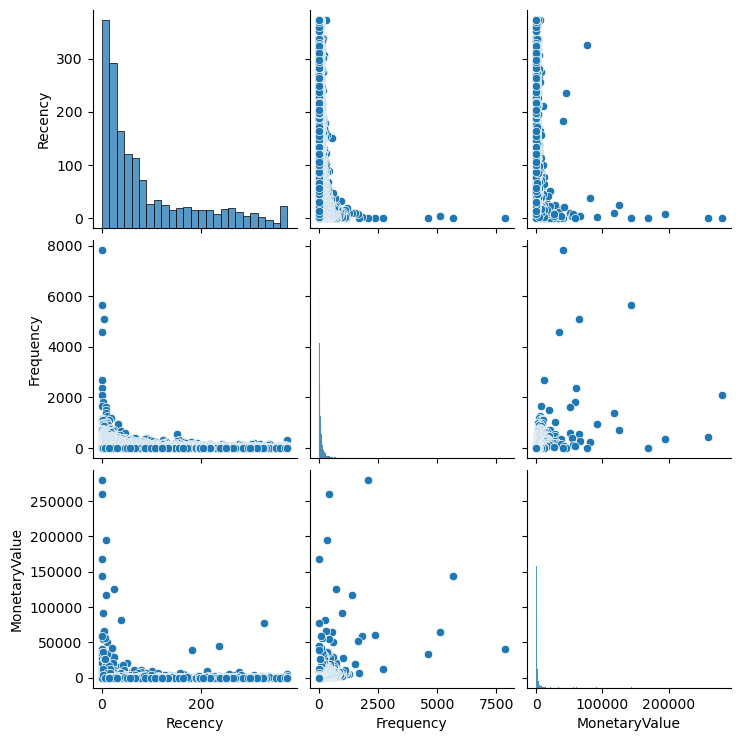

In [46]:
sns.pairplot(RFM)
plt.show()

We notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates normalization is required to make the data features normally distributed.
Clustering Algorithms require Normally Distributed dataset.

**Data Normalization**

In [47]:
#Log Transformation
rfm_r_log = np.log(RFM['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(RFM['Frequency'])
rfm_m_log = np.log(RFM['MonetaryValue']+0.1)

In [48]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
17841.0,10.621124,0.095310,8.967887
14911.0,11.876354,0.095310,8.644178
14096.0,11.084676,1.410987,8.539150
12748.0,10.425841,-2.302585,8.432942
14606.0,9.405640,0.095310,7.901007


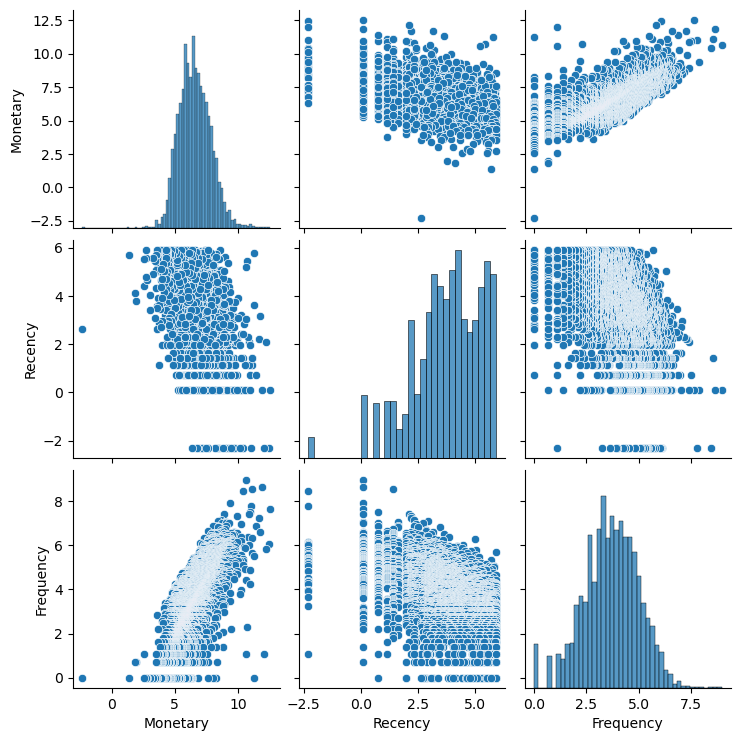

In [49]:
sns.pairplot(log_data)
plt.show()

The distributions of Frequency and Monetary are better, more normalized
but it's not the case with Recency Distribution, which is improved but not as much.

In [50]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.480603,0.756373
Recency,-0.480603,1.000000,-0.477778
Frequency,0.756373,-0.477778,1.000000


KMeans clustering is a popular unsupervised machine learning algorithm used to partition a dataset into
k distinct, non-overlapping clusters. Each cluster is defined by its centroid, which is the mean of the
points within that cluster. The algorithm aims to minimize the sum of squared distances between the data
points and their respective cluster centroids.tions is reached.

In [51]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=4)
    kmeans.fit(log_data)
    wcss.append(kmeans.inertia_)

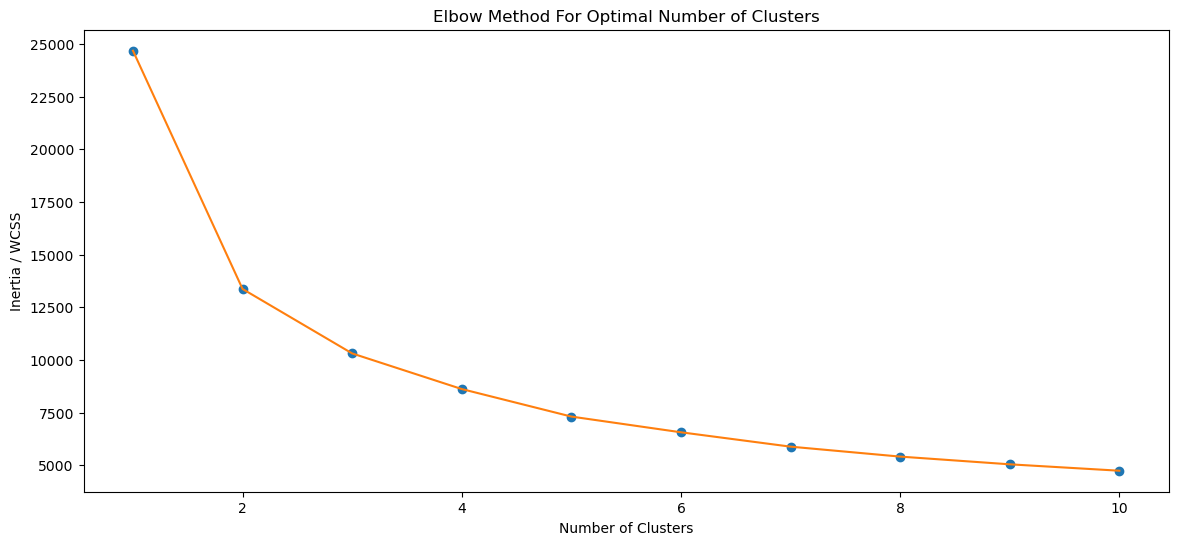

In [52]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(1, 11), wcss, 'o')
plt.plot(np.arange(1, 11), wcss, '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia / WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

Visualize Clusters

In [53]:
#Giving the optimal amount of clusters
optimal_clusters = 2

#Applying KMeans Clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=4)
clusters = kmeans.fit_predict(log_data)

#Adding the cluster assignment to the log_data dataframe
log_data['Cluster'] = clusters

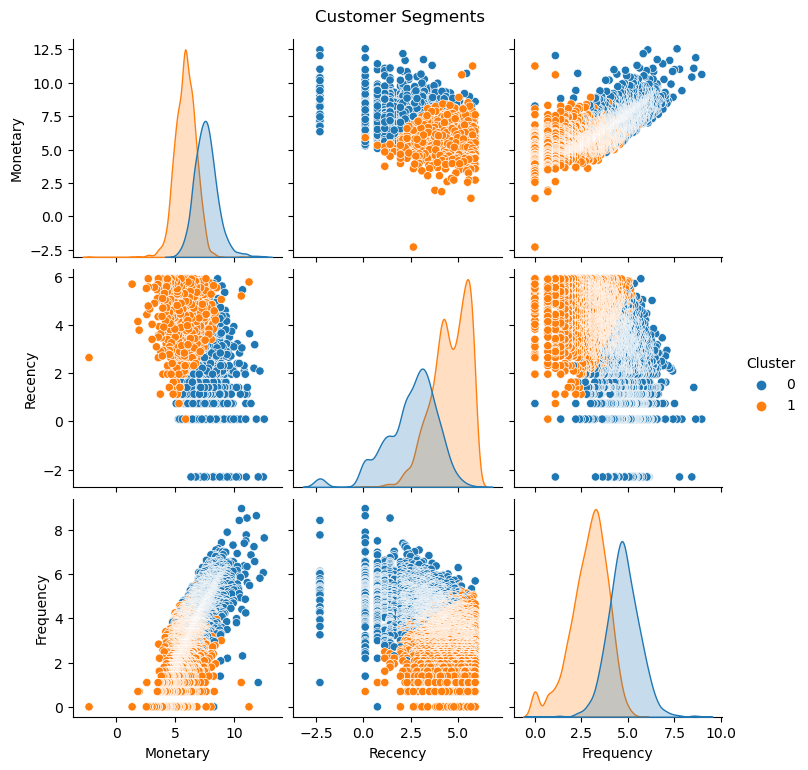

In [54]:
sns.pairplot(log_data, hue='Cluster', palette='tab10')
plt.suptitle('Customer Segments', y=1.02)
plt.show()